In [1]:
# 필요한 라이브러리 가져오기

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from PIL import Image

In [3]:
# 이미지 불러오기

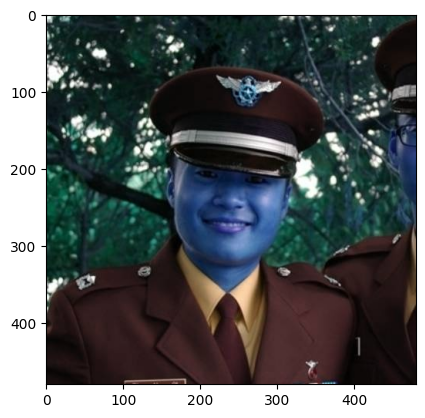

In [26]:
image_path = '/content/drive/MyDrive/AIFFEL/EXPLORATION/Quest03/images/ksy.jpg'
img_bgr = cv2.imread(image_path)    # OpenCV로 이미지를 불러옵니다
plt.imshow(img_bgr)
plt.show()

In [8]:
# BGR을 RGB로 바꿔주기

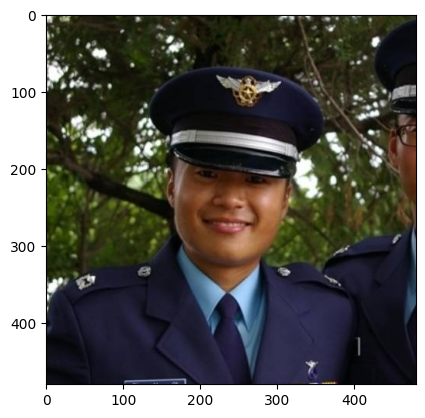

In [27]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [40]:
# 이미지 크기 수정

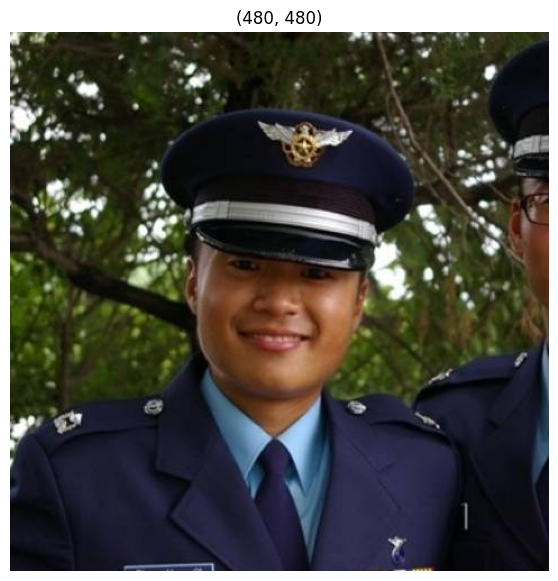

In [38]:
image = Image.open(image_path)

plt.figure(figsize=(7,7))
plt.imshow(image)
plt.title(image.size)
plt.axis('off')
plt.show()

In [ ]:
# 얼굴 검출(Face Detection)

In [41]:
# bounding box 추출

In [43]:
print('원본 이미지 형식 : ', type(image))
image = np.array(image)
print('변환 이미지 형식 : ', type(image))
image_show = image.copy() # 원본 이미지 image_show 이름으로 저장

detector_hog = dlib.get_frontal_face_detector()      # Face detector, Returns the default face detector
face_detection = detector_hog(image_show, 1)         # detect input img, para 1 means 1 times upsamle

print(face_detection)

원본 이미지 형식 :  <class 'numpy.ndarray'>
변환 이미지 형식 :  <class 'numpy.ndarray'>
rectangles[[(167, 167) (322, 322)]]


In [44]:
# Detected Face(image) Visualization

In [46]:
for rect in face_detection:
    left = rect.left()      # left x value
    top = rect.top()        # top y value
    right = rect.right()    # right x value
    bottom = rect.bottom()  # detect box bottom y value

    # add detect box in image
    cv2.rectangle(image_show, (left, top), (right, bottom), (0,255,0), 2) # 상자 그리기 Face Detection

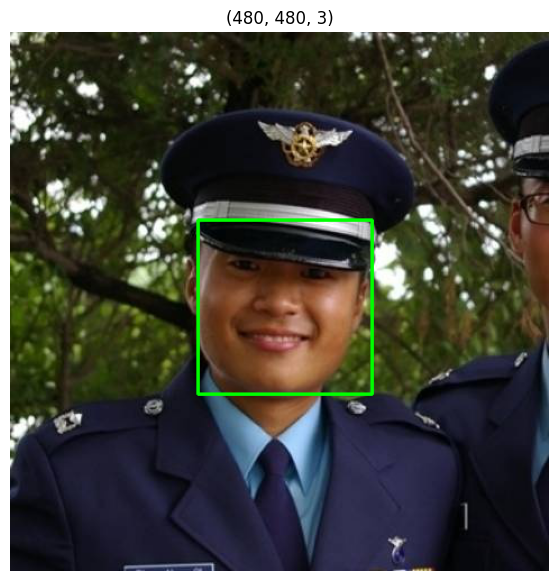

In [47]:
plt.figure(figsize=(7,7))
plt.imshow(image_show)
plt.title(image_show.shape)
plt.axis('off')
plt.show()

In [48]:
# Face Landmark (Dlib landmark localization)

In [30]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2023-07-13 02:32:39--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.8MB/s    in 4.6s    

2023-07-13 02:32:44 (13.3 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [49]:
#  landmark 모델 불러오기

In [50]:
model_path = datFile
landmark_predictor = dlib.shape_predictor(model_path)

In [51]:
# dlib.full_object_detection 반환

In [52]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for landmark in face_detection:
    points = landmark_predictor(image, landmark)

    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 68 landmark count

68


In [53]:
# landmark 출력

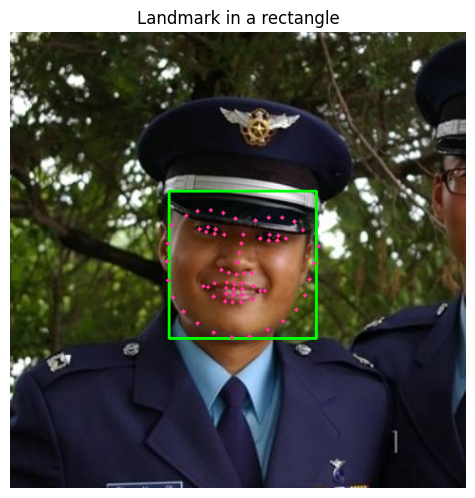

In [56]:
for landmark in list_landmarks:
    for index, point in enumerate(landmark):
        cv2.circle(image_show, point, 2, (255, 51, 153), -1)

plt.figure(figsize=(20,18))
plt.subplot(1,3,1)
plt.imshow(image_show)
plt.title('Landmark in a rectangle')
plt.axis('off')
plt.show()

In [15]:
# 스티커 가져오기

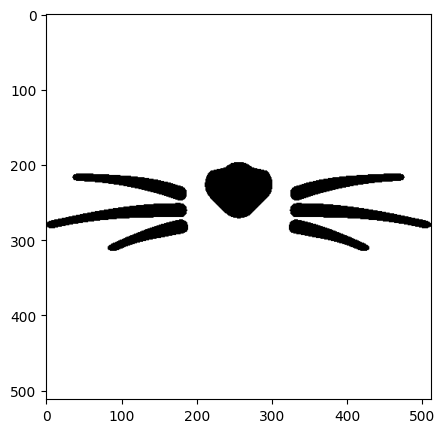

In [57]:
sticker_path = '/content/drive/MyDrive/AIFFEL/EXPLORATION/Quest03/images/cat-whiskers.png'
sticker = Image.open(sticker_path).convert('RGB')

plt.figure(figsize=(12, 5))
plt.imshow(sticker)
plt.show()


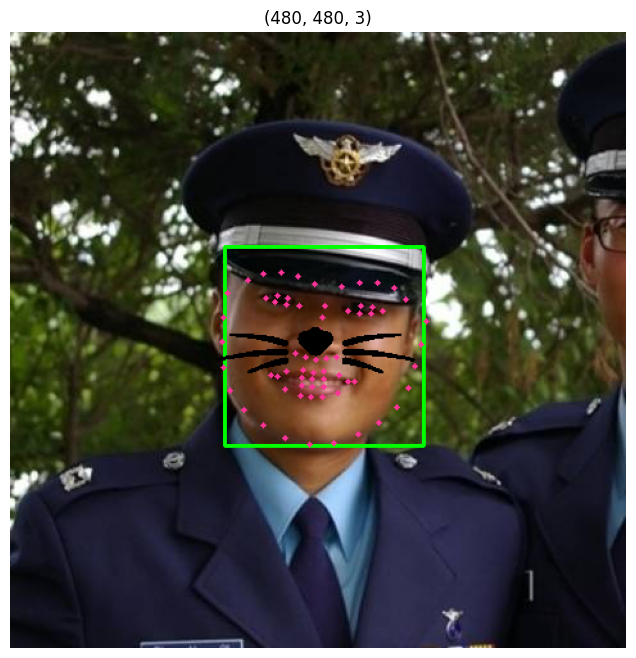

In [58]:
for face_rect, landmark in zip(face_detection, list_landmarks):

    x = (landmark[30][0] + landmark[33][0]) // 2
    y = (landmark[30][1] + landmark[33][1]) // 2

    w = face_rect.width()
    h = face_rect.height()

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2    # left
refined_y = y - h // 2    # top

sticker_area = image_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
image_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.figure(figsize=(8,8))
plt.imshow(image_show)
plt.title(image_show.shape)
plt.axis('off')
plt.show()

In [34]:
# 랜드 마크 없이 스티커 적용하기

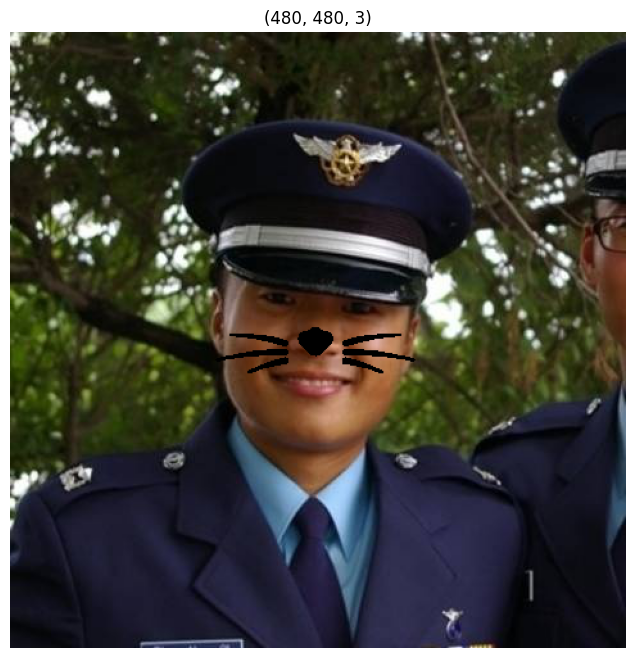

In [59]:
sticker_area = image[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

image[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.figure(figsize=(8,8))
plt.imshow(image)
plt.title(image.shape)
plt.axis('off')
plt.show()